# ASL ML Workshop - Review of Day 3
- Introduction to scikit learn https://scikit-learn.org/
- Prep data with pandas
- Building logistic regression model using scikit learn
- Predicting with logistic regression model
- Scoring the model
- Model evaluation (evaluation metrics)
- Train - test split
- Build the model with splitted dataset
- ROC foundation (specificity & sensitivity)
- Adjusting the threshold for logistic regression
- The ROC curve
- Area under curve
- Comparision of two models

# What is Jupyter notebook?
Jupyter Notebook is an interactive computing environment that allows users to create and share documents that contain live code, equations, visualizations, and narrative text. It is an open-source web application that supports over 100 programming languages, including Python, R, and Julia.

# Scikit Learn

Scikit-learn is a popular Python library for machine learning that provides a range of tools for various tasks such as classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. It is built on top of NumPy, SciPy, and matplotlib, which are also popular scientific computing libraries in Python.

In [3]:
# pip install scikit-learn

# Prep data with pandas

Prepare the training data with pandas

In [4]:
import pandas as pd

df = pd.read_csv('../titanic.csv')

In [5]:

df # our dataset

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [6]:
# create a new feature column

df['Male'] = df['Sex'] == 'male'

In [7]:
df

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,Male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,True
883,1,1,female,19.0,0,0,30.0000,False
884,0,3,female,7.0,1,2,23.4500,False
885,1,1,male,26.0,0,0,30.0000,True


In [8]:
# create numpy array for training

X = df[['Pclass','Male','Age','Siblings/Spouses','Parents/Children','Fare']].values

y = df['Survived'].values

print(X.shape)

(887, 6)


# Building logistic regression model

Logistic regression is a popular statistical model used for binary classification problems, where the goal is to predict a binary outcome (e.g., yes/no, 0/1) based on a set of input features. It is a type of linear model that uses a logistic function to model the probability of the binary outcome.

In [9]:
from sklearn.linear_model import LogisticRegression as LgR

model = LgR() # create an instance of LogisticRegression 

In [10]:
model

LogisticRegression()

# Training the model with our dataset
Training the model with titanic dataset

In [11]:
model.fit(X,y) # passing the feature array X and the target y

# now the model will find the best parameters for our classification dataset

LogisticRegression()

In [12]:
print(model.coef_,model.intercept_)

[[-1.13645864 -2.64409952 -0.04237386 -0.38746665 -0.09619815  0.00297182]] [5.08857693]


# Predicting with logistic regression model
Making prediction with the trained model

In [13]:
# prediction for a random person
print(model.predict([[3,True,22,0,1,7.25]]))

[0]


In [14]:
# prediction for first 5 entry in the dataset
print(model.predict(X[:5]))

[0 1 1 1 0]


In [15]:
# actual survival data \
# for first 5 entry in the dataset
print(y[:5])

[0 1 1 1 0]


# Scoring the model
Scoring the trained model

In [16]:
y_pred = model.predict(X)

In [17]:
print(y_pred)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1
 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1
 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 

In [18]:
(y == y_pred).sum() # number of correct predictions

714

In [19]:
# score
print((y == y_pred).sum()/y.shape[0])

0.8049605411499436


In [20]:
print(model.score(X,y))

0.8049605411499436


# Model evaluation
Evaluation metrics
- Accuracy
- Precision
- Recall
- F1 score

In [21]:
# necessary imports
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as rec
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cfm

In [22]:
# accuracy score
print("Accuracy :",acc(y,y_pred))

Accuracy : 0.8049605411499436


# Confusion Matrix

A 2 x 2 matrix
- 0th row actually positive
- 1st row actually negative
- 0th column predicted positive
- 1st column predicted negative
- (0,0) => True positives, TP
- (0,1) => False positives, FP
- (1,0) => False negatives, FN
- (1,1) => True negatives, TN


In [23]:
print("Confusion matrix :\n",cfm(y,y_pred))
# this will produce the matrix in reverse order \
# this is because 0 correspond to negative and 1 correspond to positive

Confusion matrix :
 [[475  70]
 [103 239]]


In [24]:
# precission = TP / (TP + FP)
print("Precision :",prec(y,y_pred))

Precision : 0.7734627831715211


In [25]:
# recall = TP / (TP + FN)
print("Recall :",rec(y,y_pred))

Recall : 0.6988304093567251


In [26]:
# f1 score = 2 * precision * recall / (precision + recall)
print("F1 score :",f1(y,y_pred))

F1 score : 0.7342549923195083


# Train - test split
Use separate data for traing and testing purpose

In [27]:
# necessary imports
from sklearn.model_selection import train_test_split as split

In [28]:
# split the dataset
X_train,X_test,y_train,y_test = split(X,y,train_size=0.8)

In [29]:
print("Full dataset :",X.shape,y.shape)

Full dataset : (887, 6) (887,)


In [30]:
print("Training dataset: ",X_train.shape,y_train.shape)

Training dataset:  (709, 6) (709,)


In [31]:
print("Test dataset: ",X_test.shape,y_test.shape)

Test dataset:  (178, 6) (178,)


# Rebuild the model with splitted dataset
This will provide more accurate evaluation

In [32]:
model_new = LgR()

In [33]:
model_new.fit(X_train,y_train)
y_pred = model_new.predict(X_test)

In [34]:
# accuracy score
print("Accuracy :",acc(y_test,y_pred))

Accuracy : 0.7865168539325843


In [35]:
# precision score
print("Precision :",prec(y_test,y_pred))

Precision : 0.7627118644067796


In [36]:
# recall score
print("Recall score :",rec(y_test,y_pred))

Recall score : 0.6521739130434783


In [37]:
# f1 score
print("F1 score :",f1(y_test,y_pred))

F1 score : 0.703125


# Specificity & Sensitivity
Foundation of ROC (Reciever Operating Characteristic) curve

In [38]:
# necessary imports
from sklearn.metrics import precision_recall_fscore_support as prfs

In [39]:
sensitivity = rec # sensitivity is another term for recall

In [40]:
# specificity = TN / (TN + FN)
# recall of the negative class

def specificity(y,y_pred):
    p,r,f,s = prfs(y,y_pred)
    return r[0] # r[0] is the recall of the negative class here

In [41]:
print(sensitivity(y_test,y_pred))

0.6521739130434783


In [42]:
print(specificity(y_test,y_pred))

0.8715596330275229


# Adjusting the threshold
Tweeking the default threshold values can be beneficial to boost precision or recall

model.predict_proba(X_test)

The result is a numpy array with 2 values for each datapoint i.e., the first value is the probability that the datapoint is in the 0 class and the second value is the probality of the datapoint being in the 1 class.

In [43]:
print(model_new.predict_proba(X_test))

[[0.84127657 0.15872343]
 [0.17322886 0.82677114]
 [0.2304446  0.7695554 ]
 [0.6388349  0.3611651 ]
 [0.06479251 0.93520749]
 [0.66903298 0.33096702]
 [0.56573925 0.43426075]
 [0.48844213 0.51155787]
 [0.85734093 0.14265907]
 [0.36143086 0.63856914]
 [0.86105359 0.13894641]
 [0.72837058 0.27162942]
 [0.62850731 0.37149269]
 [0.85542623 0.14457377]
 [0.88611548 0.11388452]
 [0.84980454 0.15019546]
 [0.32440351 0.67559649]
 [0.72675937 0.27324063]
 [0.16874272 0.83125728]
 [0.22754954 0.77245046]
 [0.74589856 0.25410144]
 [0.3759123  0.6240877 ]
 [0.9068679  0.0931321 ]
 [0.38045663 0.61954337]
 [0.22152368 0.77847632]
 [0.60300662 0.39699338]
 [0.85551499 0.14448501]
 [0.54277082 0.45722918]
 [0.84974054 0.15025946]
 [0.0822468  0.9177532 ]
 [0.95183601 0.04816399]
 [0.04187442 0.95812558]
 [0.93874661 0.06125339]
 [0.76973438 0.23026562]
 [0.98233392 0.01766608]
 [0.80746787 0.19253213]
 [0.31476936 0.68523064]
 [0.89040837 0.10959163]
 [0.93052452 0.06947548]
 [0.37328658 0.62671342]


In [44]:
threshold = 0.75
# set the new threshold \
# default is 0.5

In [45]:
y_pred = model_new.predict_proba(X_test)[:,1] > threshold

In [46]:
print((y_test == y_pred).sum())

136


In [47]:
print("Precision :",prec(y_test,y_pred))

Precision : 0.9090909090909091


# ROC curve
Graphical evaluation of models

In [48]:
# imports
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc

In [49]:
# obtain specificity and sensitivity for every possible threshold
fpr,tpr,thresholds = roc(y_test,model_new.predict_proba(X_test)[:,1])

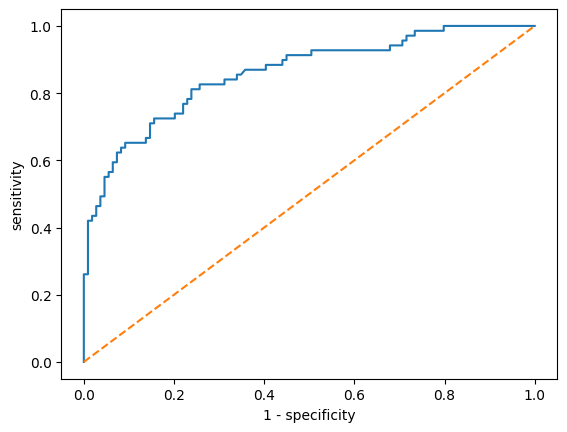

In [50]:
plt.ylabel('sensitivity')
plt.xlabel('1 - specificity')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle = '--')
plt.show()

# Area under curve
Numeric measure of the area covered by the curve. Maximum is 1.

In [51]:
y_pred_proba = model_new.predict_proba(X_test)

In [52]:
# auc score
print(auc(y_test,y_pred_proba[:,1]))

0.859260736604175


Comparision of 2 different models

In [53]:
model2 = LgR()
# creating a new model with fewer features
model2.fit(X_train[:,0:2],y_train)
y_pred_proba2 = model2.predict_proba(X_test[:,0:2])

In [54]:
print(auc(y_test,y_pred_proba2[:,1]))

0.8474936843504853


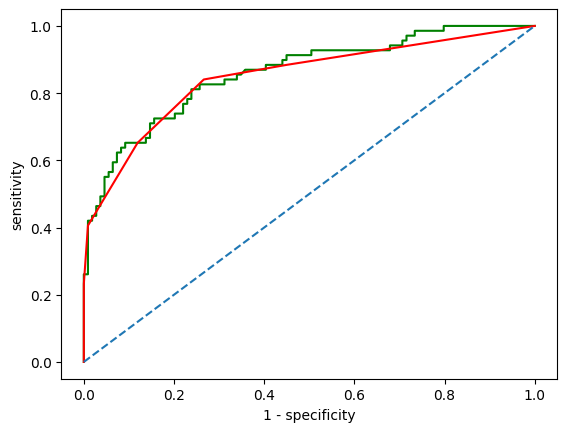

In [55]:
fpr2,tpr2,thresholds2 = roc(y_test,y_pred_proba2[:,1])
plt.ylabel('sensitivity')
plt.xlabel('1 - specificity')
plt.plot(fpr,tpr,color = 'green')
plt.plot(fpr2,tpr2,color = 'red')
plt.plot([0,1],[0,1],linestyle = '--')
plt.show()

# K-Fold cross validation
Instead of doing a single train/test split, we'll split our data into a training set and test set multiple times

In [56]:
# necessary imports
from sklearn.model_selection import KFold as kf

In [57]:
# we're doing 3 splits
kfold = kf(n_splits = 3,shuffle = True)

In [58]:
# using a smaller dataset
X_small = df[['Age','Fare']].values[:6]
y_small = df['Survived'].values[:6]

In [59]:
for train,test in kfold.split(X_small):
    print(train,test)

[0 1 3 4] [2 5]
[2 3 4 5] [0 1]
[0 1 2 5] [3 4]


In [60]:
# now take the full dataset
splits = list(kfold.split(X))

In [61]:
first_split = splits[0]

In [62]:
print("Test datapoints :",first_split[1].shape)

Test datapoints : (296,)


In [63]:
train_indices,test_indices = first_split
print("Test set indices :\n",test_indices)

Test set indices :
 [  0   2   4   8  10  14  15  22  23  24  29  33  36  37  44  46  48  49
  53  55  57  59  66  67  72  74  75  78  83  85  87  89  91  92  96  98
 106 107 110 111 114 117 118 120 121 123 130 133 141 142 144 146 150 152
 158 162 163 164 169 170 173 174 177 178 179 182 190 193 194 195 201 202
 207 209 212 214 216 218 220 221 228 230 237 243 244 245 246 247 253 254
 257 259 263 266 269 271 273 279 285 286 289 292 294 296 298 305 306 310
 316 320 321 331 332 333 334 336 344 350 357 358 363 373 374 375 376 379
 383 391 396 398 401 405 406 409 410 417 420 421 423 429 430 434 435 437
 443 449 452 453 456 457 458 469 476 477 479 482 484 495 496 500 508 509
 510 511 522 526 527 528 529 531 532 533 535 536 537 538 543 544 546 548
 550 551 552 554 555 556 557 564 567 574 575 576 577 579 581 586 588 591
 593 595 598 600 604 607 608 611 614 620 622 625 629 633 635 637 641 645
 647 650 655 657 658 660 662 664 666 667 673 675 676 681 685 687 688 692
 695 696 697 700 713 714 718 72

Let's do 3 fold cross validation

In [64]:
scores = []
for train_index,test_index in splits:
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    model = LgR()
    model.fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))

In [65]:
print(scores)

[0.8108108108108109, 0.793918918918919, 0.7932203389830509]


In [66]:
import numpy as np
print(np.mean(scores))

0.7993166895709268


Model finalization

In [67]:
final_model = LgR()
final_model.fit(X,y)
print(final_model.score(X,y))

0.8049605411499436
